In [1]:
from penalty_threshold_gas_storage_env import GasStorageEnv
import numpy as np
import os
import matplotlib.pyplot as plt
from stable_baselines3 import PPO, DDPG, TD3, A2C, SAC, DQN
from util_train_test import run_test
from utils_plot import plot_sigma_robustness,plot_sigma_robustness_single

import pandas as pd

# **ASSESSING ROBUSTNESS FOR DIFFERENT SIGMAS**

In [17]:
# 1) Test sigma values
sigma_s = [0.035, 0.04, 0.045, 0.05, 0.055, 0.06,0.065,0.07]

# 2) Metrics
ep_metric_keys = [
    "reward", "bank account", "inventory", "market", "demand", "supply", 
    "excess demand", "demand shifter", "supply shifter", "delta price", "price","reward for the mean", "november inventory","demand unsat","wasted supply"
]

# 3) Episodes and steps
n_episodes     = 3
max_test_steps = 3

## *BASELINE MODEL (NO PENALTY TRESHOLD)*

In [18]:
 #load model 
model = SAC.load("/home/tizianobacaloni/tiziano_data/experiments_27/modelSAC_ts1500000_pen1000.0_pen_thresh0.0_rep4_vol_pen20/sac_model_1500000_pen1000.0_pen_thresh0.0_rep4.zip")

In [19]:
cumulative = ["reward", "market","Bank account"]
# 1) Accumulators
sigma_vals = []
means_dict = {k: [] for k in ep_metric_keys}
cis_dict   = {k: [] for k in ep_metric_keys}

# 2) For each sigma, compute the mean of each metric  
for sigma in sigma_s:
    tmp_mean, tmp_ci, _, _ = run_test(model, n_episodes, max_test_steps, ep_metric_keys, sigma=sigma)
    sigma_vals.append(sigma)
    
    for key in ep_metric_keys:
        if key in  cumulative:
            means_dict[key].append(((tmp_mean[key])[0][-1]))  # Ho un dizionario con le diverse chiavi: ciascuna chiave continene una lista di 2 elementi ed il primo è vettore di max_test_step di cui ciascun valore è la media,a quello step, sugli n_episodes
            cis_dict[key].append(((tmp_ci[key][0][-1])))      # Dal momento che queste variabili sono cumulative, prendo solo l'ultimo elemento della lista
                                                              # Per farlo mi serve fare prima [0], perchè altrimenti non riesci ad accedere al primo elemento della lista cioè il vettore    
        else:  #####MEAN OF THE MEAN ACROSS REPETITION
            means_dict[key].append(np.nanmean(tmp_mean[key])) # Con riferimento al vettore di cui sopra, non prendo l'ultimo elemento ma il valore medio sui max_test_step valori che compongono il vettore
            cis_dict[key].append(np.nanmean(tmp_ci[key]))     # Faccio la media, su max_test_step, dei valori medi calcolati, per ogni step, sulle n_reps ripetizioni

# 3) Sving folder
save_root = "Sigma_without_pen_thresh"
os.makedirs(save_root, exist_ok=True)

# 4) Database  to be saved for faster plotting
np.save(os.path.join(save_root, "means_dict.npy"), means_dict)
np.save(os.path.join(save_root, "cis_dict.npy"),   cis_dict)
print(f"[OK] Salvati means_dict e cis_dict in {save_root}/")


print(f"[OK] Salvato file combinato robustness_data.npz in {save_root}/")

/home/tizianobacaloni/tiziano_data/miniconda3/lib/python3.12/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/home/tizianobacaloni/tiziano_data/miniconda3/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(
/home/black-it-experiments/disk/tiziano_data/RL4GasStorage/gas_storage_model/util_train_test.py:276: RuntimeWarning: All-NaN slice encountered
  mean = np.squeeze(np.nanmedian(data, axis=0)) # mediana passo‑per‑passo → vettore di lunghezza max_test_steps
/home/tizianobacaloni/tiziano_data/miniconda3/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_23354/3173705757.py:18: RuntimeWarning: Mean of empty slice
  me

Test completato con 3 ripetizioni
Test completato con 3 ripetizioni
Test completato con 3 ripetizioni
Test completato con 3 ripetizioni
Test completato con 3 ripetizioni
Test completato con 3 ripetizioni
Test completato con 3 ripetizioni
Test completato con 3 ripetizioni
[OK] Salvati means_dict e cis_dict in Sigma_without_pen_thresh/
[OK] Salvato file combinato robustness_data.npz in Sigma_without_pen_thresh/


/home/black-it-experiments/disk/tiziano_data/RL4GasStorage/gas_storage_model/utils_plot.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=FIGSIZE)


<Figure size 400x400 with 0 Axes>

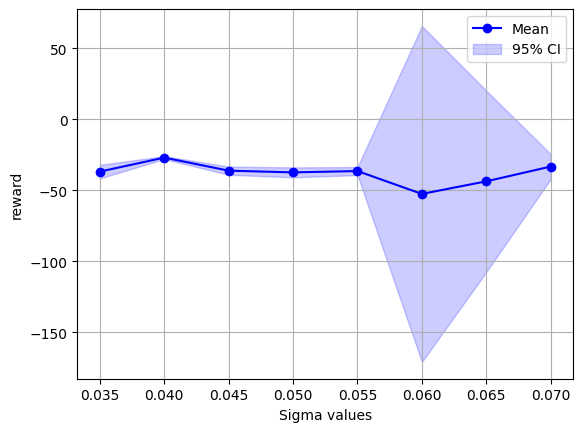

<Figure size 400x400 with 0 Axes>

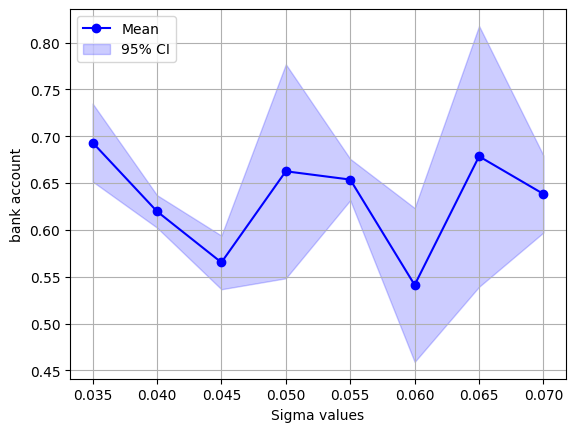

<Figure size 400x400 with 0 Axes>

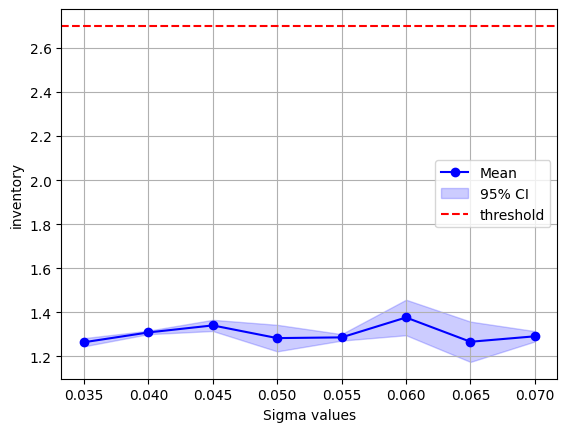

<Figure size 400x400 with 0 Axes>

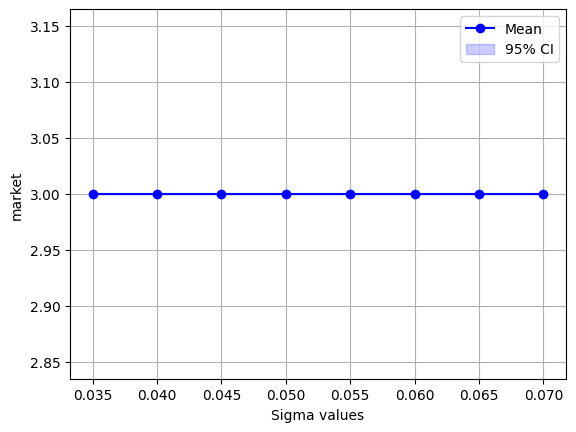

<Figure size 400x400 with 0 Axes>

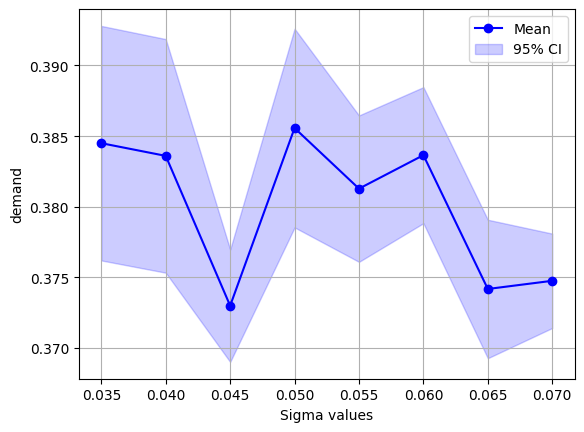

<Figure size 400x400 with 0 Axes>

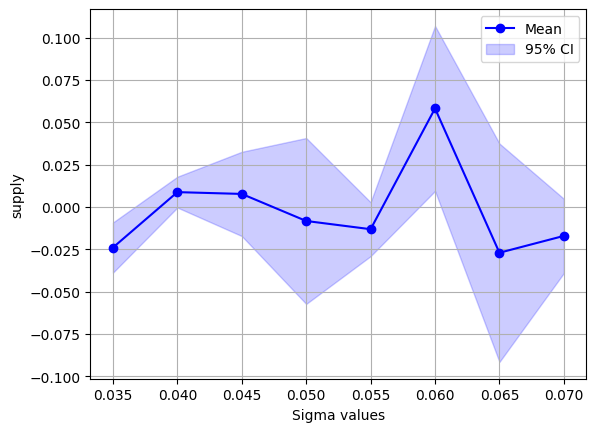

<Figure size 400x400 with 0 Axes>

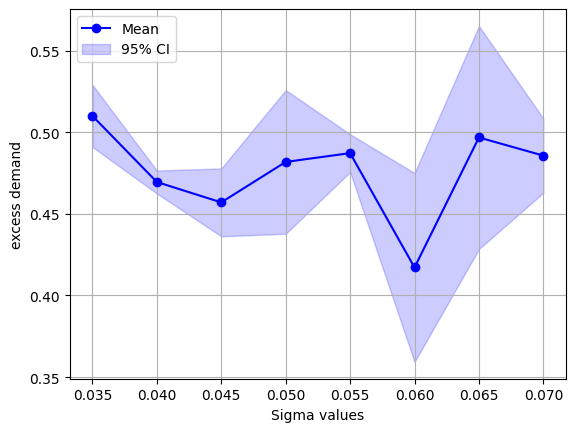

<Figure size 400x400 with 0 Axes>

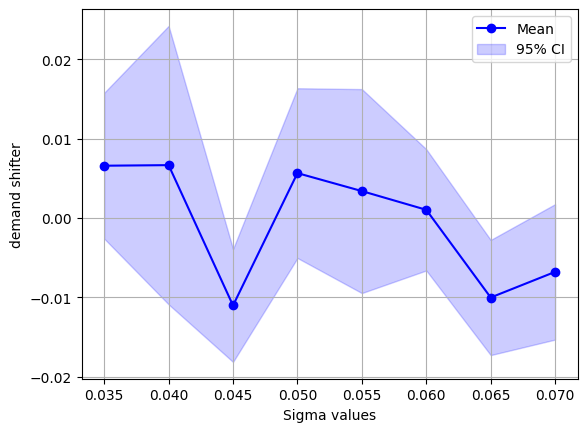

<Figure size 400x400 with 0 Axes>

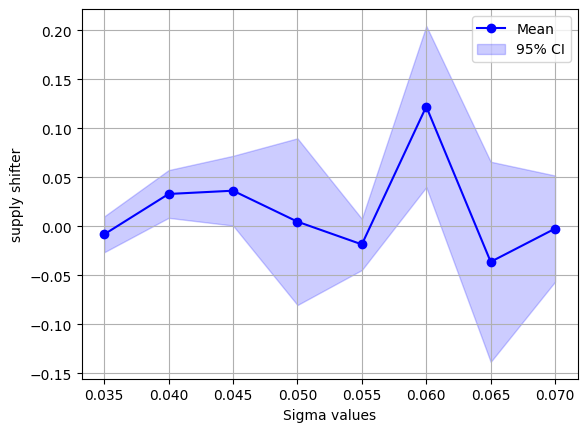

<Figure size 400x400 with 0 Axes>

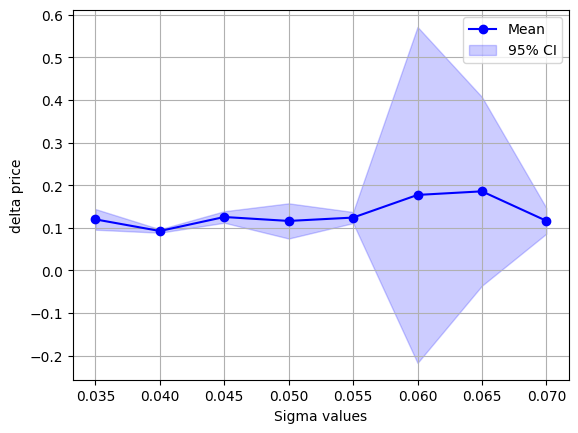

<Figure size 400x400 with 0 Axes>

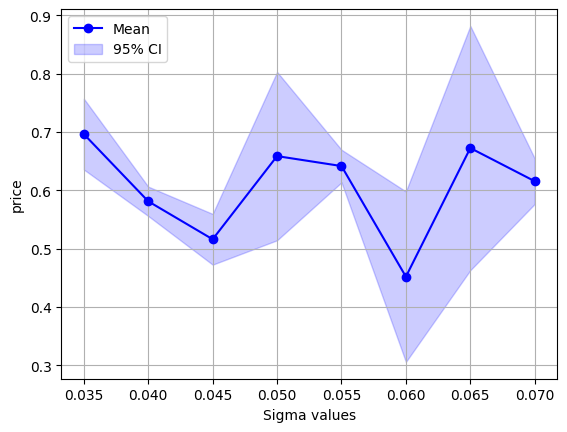

<Figure size 400x400 with 0 Axes>

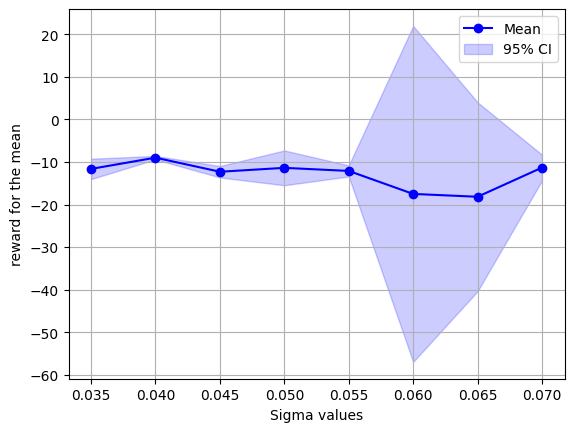

<Figure size 400x400 with 0 Axes>

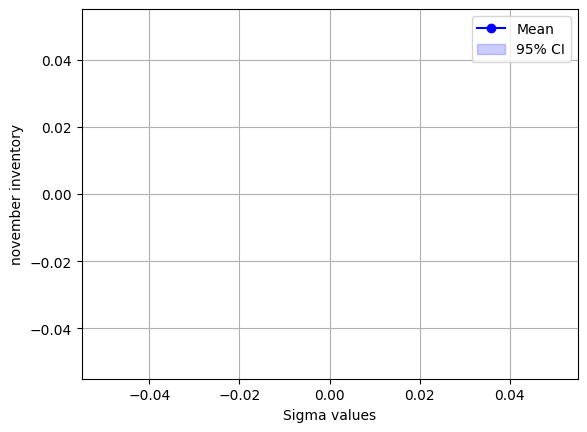

<Figure size 400x400 with 0 Axes>

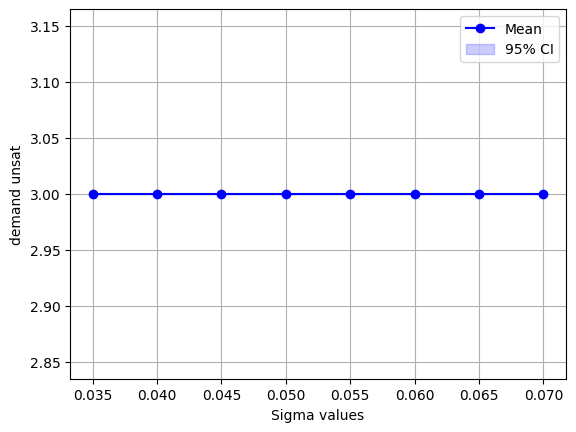

<Figure size 400x400 with 0 Axes>

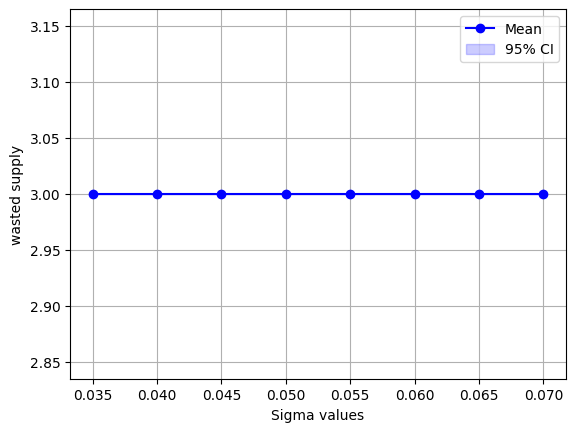

In [20]:
means_dict = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_without_pen_thresh/means_dict.npy", allow_pickle=True)
cis_dict = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_without_pen_thresh/cis_dict.npy", allow_pickle=True)
plot_sigma_robustness(sigma_vals,means_dict.item(),cis_dict.item(),ep_metric_keys)

## *MODEL WITH PENALTY TRESHOLD*

In [21]:
model = SAC.load("/home/tizianobacaloni/tiziano_data/experiments_penalty2/modelSAC_ts1500000_pen1000.0_pen_thresh1500.0_rep9_vol_pen20/sac_model_1500000_pen1000.0_pen_thresh1500.0_rep9.zip")

In [22]:
cumulative = ["reward", "market","Bank account"]
# 1) Accumulators
sigma_vals = []
means_dict = {k: [] for k in ep_metric_keys}
cis_dict   = {k: [] for k in ep_metric_keys}

# 2) For each sigma,compute the mean of each metric
for sigma in sigma_s:
    tmp_mean, tmp_ci, _, _ = run_test(model, n_episodes, max_test_steps, ep_metric_keys, sigma=sigma)
    sigma_vals.append(sigma)
    
    for key in ep_metric_keys:
        if key in  cumulative:
            means_dict[key].append(((tmp_mean[key])[0][-1]))  # Ho un dizionario con le diverse chiavi: ciascuna chiave continene una lista di 2 elementi ed il primo è vettore di max_test_step di cui ciascun valore è la media,a quello step, sugli n_episodes
            cis_dict[key].append(((tmp_ci[key][0][-1])))      # Dal momento che queste variabili sono cumulative, prendo solo l'ultimo elemento della lista
                                                              # Per farlo mi serve fare prima [0], perchè altrimenti non riesci ad accedere al primo elemento della lista cioè il vettore    
        else:
            means_dict[key].append(np.nanmean(tmp_mean[key])) # Con riferimento al vettore di cui sopra, non prendo l'ultimo elemento ma il valore medio sui max_test_step valori che compongono il vettore
            cis_dict[key].append(np.nanmean(tmp_ci[key]))     # Faccio la media, su max_test_step, dei valori medi calcolati, per ogni step, sulle n_reps ripetizioni

# 3) Saving folder
save_root = "Sigma_pen_thresh"
os.makedirs(save_root, exist_ok=True)

# 4) Database to be saved for faster plotting
np.save(os.path.join(save_root, "means_dict.npy"), means_dict)
np.save(os.path.join(save_root, "cis_dict.npy"),   cis_dict)
print(f"[OK] Salvati means_dict e cis_dict in {save_root}/")


print(f"[OK] Salvato file combinato robustness_data.npz in {save_root}/") 

Test completato con 3 ripetizioni
Test completato con 3 ripetizioni
Test completato con 3 ripetizioni
Test completato con 3 ripetizioni
Test completato con 3 ripetizioni


/tmp/ipykernel_23354/1814676128.py:18: RuntimeWarning: Mean of empty slice
  means_dict[key].append(np.nanmean(tmp_mean[key])) # Con riferimento al vettore di cui sopra, non prendo l'ultimo elemento ma il valore medio sui max_test_step valori che compongono il vettore
/tmp/ipykernel_23354/1814676128.py:19: RuntimeWarning: Mean of empty slice
  cis_dict[key].append(np.nanmean(tmp_ci[key]))     # Faccio la media, su max_test_step, dei valori medi calcolati, per ogni step, sulle n_reps ripetizioni


Test completato con 3 ripetizioni
Test completato con 3 ripetizioni
Test completato con 3 ripetizioni
[OK] Salvati means_dict e cis_dict in Sigma_pen_thresh/
[OK] Salvato file combinato robustness_data.npz in Sigma_pen_thresh/


<Figure size 400x400 with 0 Axes>

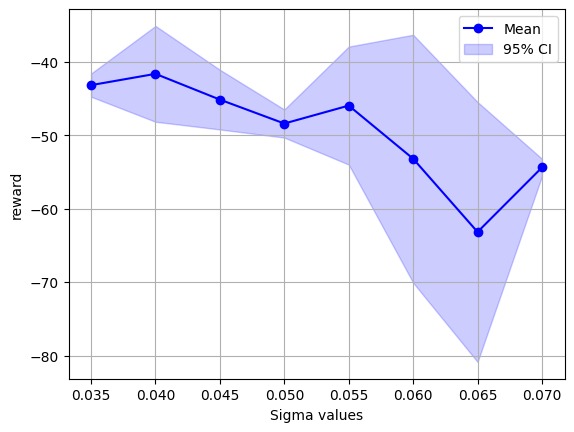

<Figure size 400x400 with 0 Axes>

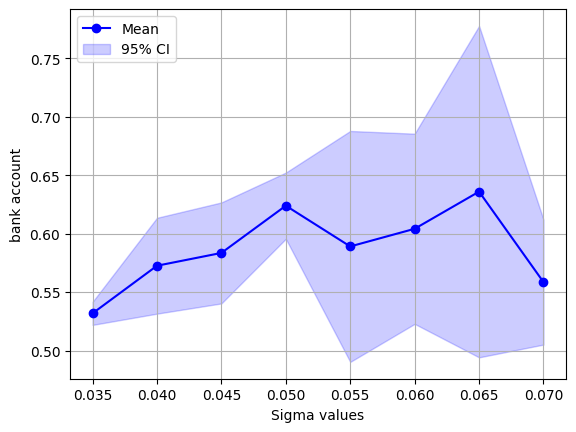

<Figure size 400x400 with 0 Axes>

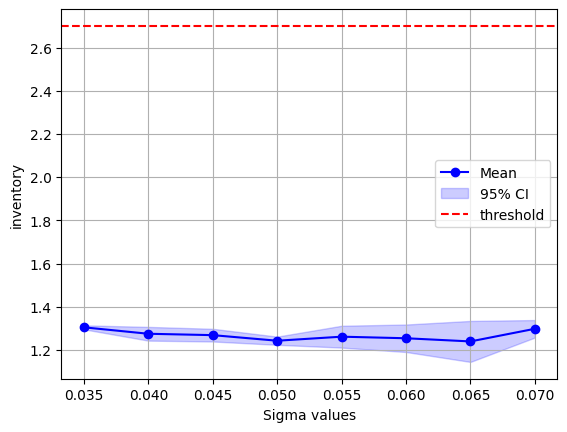

<Figure size 400x400 with 0 Axes>

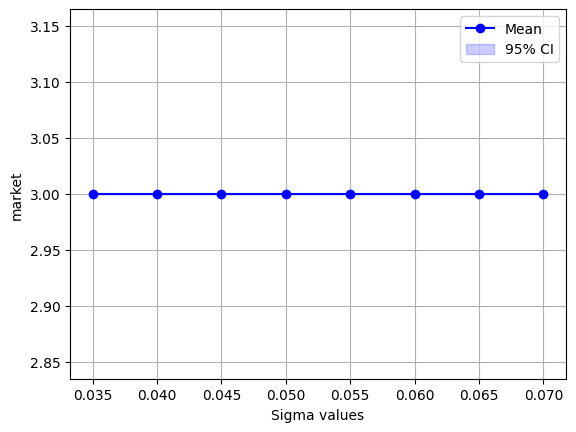

<Figure size 400x400 with 0 Axes>

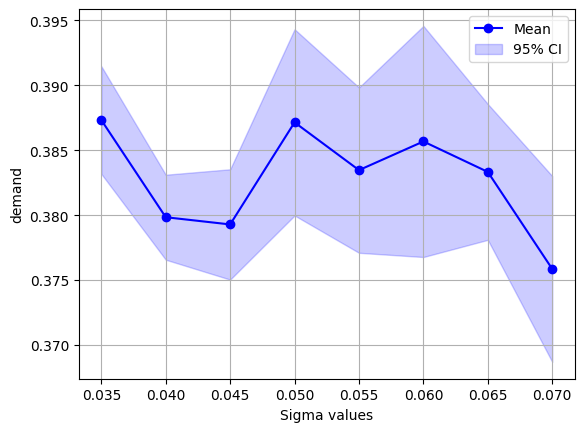

<Figure size 400x400 with 0 Axes>

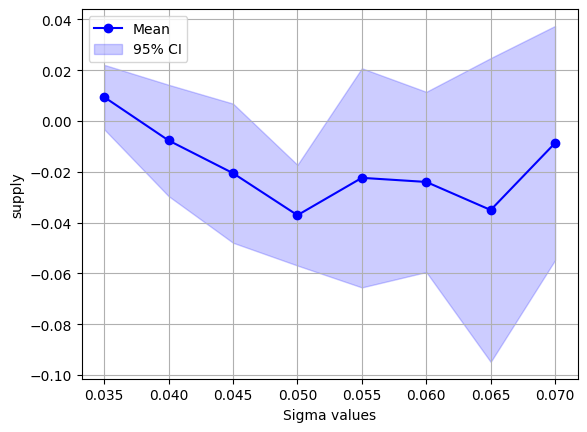

<Figure size 400x400 with 0 Axes>

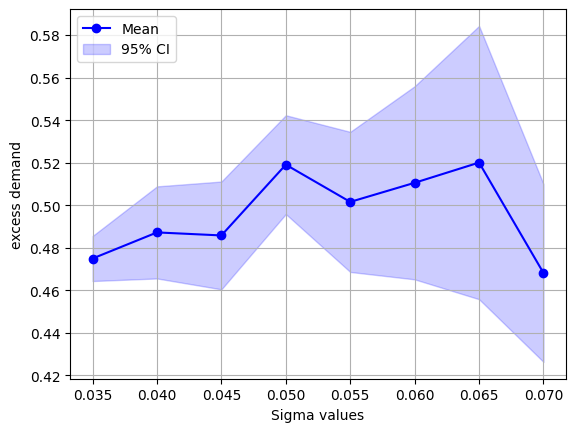

<Figure size 400x400 with 0 Axes>

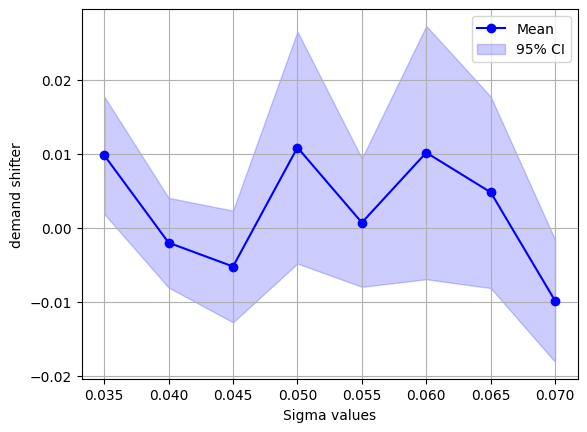

<Figure size 400x400 with 0 Axes>

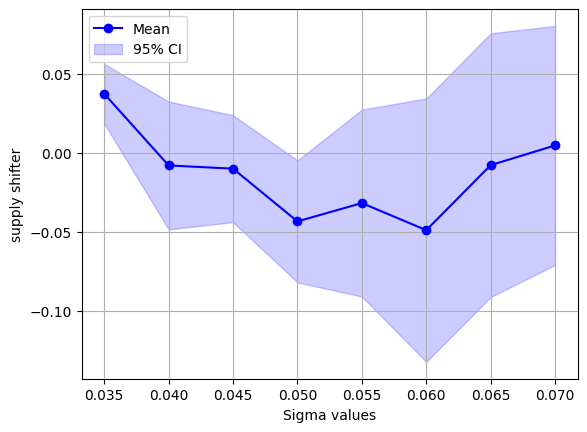

<Figure size 400x400 with 0 Axes>

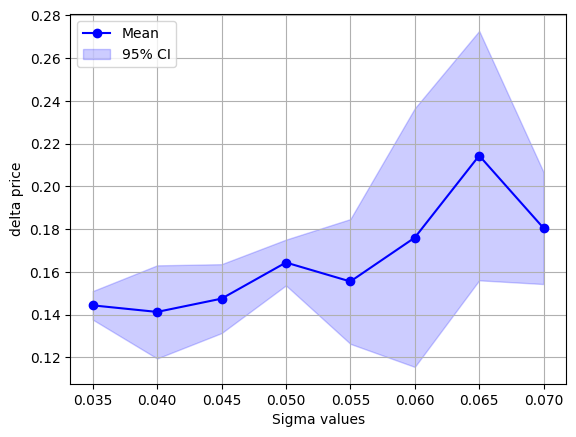

<Figure size 400x400 with 0 Axes>

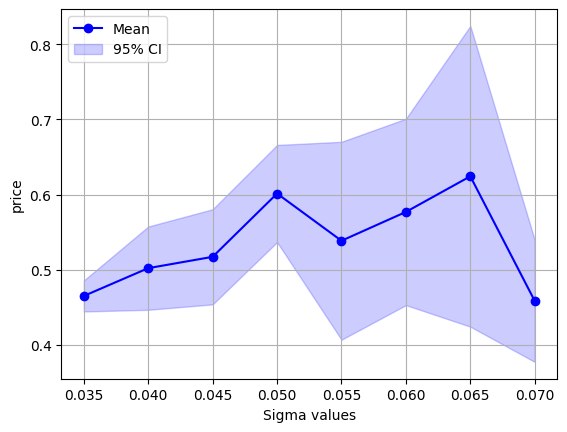

<Figure size 400x400 with 0 Axes>

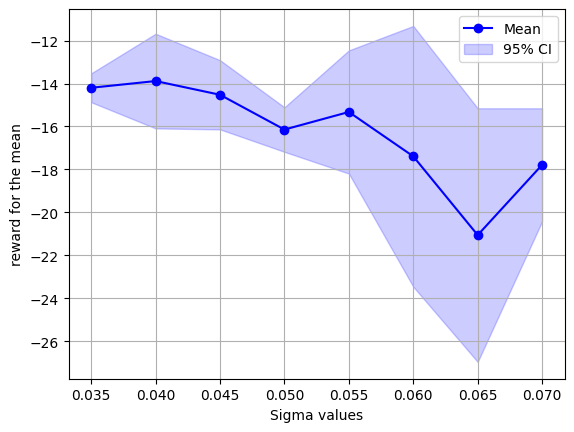

<Figure size 400x400 with 0 Axes>

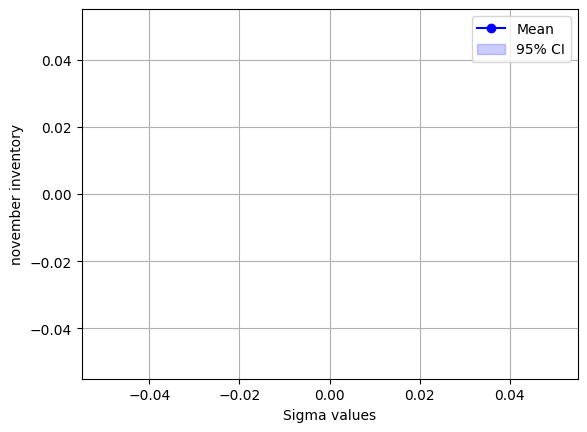

<Figure size 400x400 with 0 Axes>

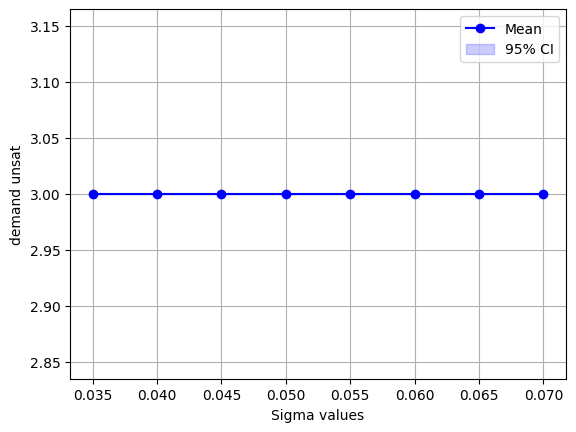

<Figure size 400x400 with 0 Axes>

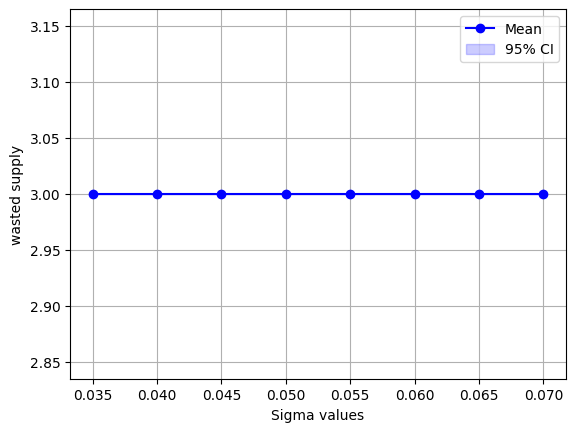

In [23]:
means_dict = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_pen_thresh/means_dict.npy", allow_pickle=True)
cis_dict = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_pen_thresh/cis_dict.npy", allow_pickle=True)
plot_sigma_robustness(sigma_vals,means_dict.item(),cis_dict.item(),ep_metric_keys)

In [24]:
FIGSIZE=(3,3)

## ***ROBUSTNESS COMPARISON***

#### MARKET SUCCESS

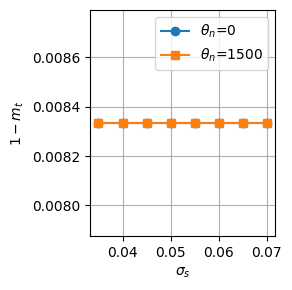

In [25]:

means_dict_1 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_without_pen_thresh/means_dict.npy", allow_pickle=True).item()
means_dict_2 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_pen_thresh/means_dict.npy", allow_pickle=True).item()
cis_dict_1 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_without_pen_thresh/cis_dict.npy", allow_pickle=True).item()
cis_dict_2 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_pen_thresh/cis_dict.npy", allow_pickle=True).item()


market_1 = means_dict_1["market"]
market_2 = means_dict_2["market"]
market_1_ci = cis_dict_1["market"]
market_2_ci = cis_dict_2["market"]

# Plotta i valori "market" rapportati a 360 per entrambi gli esperimenti
plt.figure(figsize=FIGSIZE)
plt.plot(sigma_s, np.array(market_1) / 360, marker='o', label=r"$\theta_n$=0")
plt.fill_between(sigma_s, 
                 (np.array(market_1) - np.array(market_1_ci)) / 360, 
                 (np.array(market_1) + np.array(market_1_ci)) / 360, 
                 alpha=0.5)

plt.plot(sigma_s, np.array(market_2) / 360, marker='s', label=r"$\theta_n$=1500")
plt.fill_between(sigma_s, 
                 (np.array(market_2) - np.array(market_2_ci)) / 360, 
                 (np.array(market_2) + np.array(market_2_ci)) / 360, 
                 alpha=0.5)

plt.xlabel(r"$\sigma_s$")
plt.ylabel(r"$1-m_t$")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

#### INVENTORY

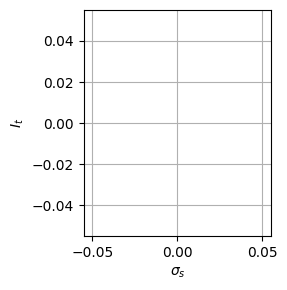

In [ ]:
means_dict_1 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_without_pen_thresh/means_dict.npy", allow_pickle=True).item()
means_dict_2 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_pen_thresh/means_dict.npy", allow_pickle=True).item()
cis_dict_1 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_without_pen_thresh/cis_dict.npy", allow_pickle=True).item()
cis_dict_2 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_pen_thresh/cis_dict.npy", allow_pickle=True).item()


market_1 = means_dict_1["november inventory"]
market_2 = means_dict_2["november inventory"]
market_1_ci = cis_dict_1["november inventory"]
market_2_ci = cis_dict_2["november inventory"]

# Plotta i valori "market" rapportati a 360 per entrambi gli esperimenti
plt.figure(figsize=FIGSIZE)
plt.plot(sigma_s, np.array(market_1) , marker='o',label=r"$\theta_n$=0")
plt.fill_between(sigma_s, 
                 (np.array(market_1) - np.array(market_1_ci)) , 
                 (np.array(market_1) + np.array(market_1_ci)) , 
                 alpha=0.5)

plt.plot(sigma_s, np.array(market_2) , marker='s',label=r"$\theta_n$=1500")
plt.fill_between(sigma_s, 
                 (np.array(market_2) - np.array(market_2_ci)) , 
                 (np.array(market_2) + np.array(market_2_ci)) , 
                 alpha=0.5)

plt.xlabel(r"$\sigma_s$")
plt.ylabel(r"$I_t$")
plt.tight_layout()
plt.grid(True)
plt.show()

#### PRICE
##### Price values are defined as: mean of price series, with lenght=max_test_step, in which each value t is the mean across n_reps

In [ ]:
# Carica i dati dei due esperimenti
means_dict_1 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_without_pen_thresh/means_dict.npy", allow_pickle=True).item()
means_dict_2 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_pen_thresh/means_dict.npy", allow_pickle=True).item()
cis_dict_1 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_without_pen_thresh/cis_dict.npy", allow_pickle=True).item()
cis_dict_2 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_pen_thresh/cis_dict.npy", allow_pickle=True).item()

# Estrai i valori medi e gli intervalli di confidenza della metrica "market"
market_1 = means_dict_1["price"]
market_2 = means_dict_2["price"]
market_1_ci = cis_dict_1["price"]
market_2_ci = cis_dict_2["price"]

# Plotta i due grafici con intervalli di confidenza
plt.figure(figsize=FIGSIZE)
plt.plot(sigma_s, market_1, marker='o', label=r"$\theta_n$=0")
plt.fill_between(sigma_s, 
                 np.array(market_1) - np.array(market_1_ci), 
                 np.array(market_1) + np.array(market_1_ci), 
                 alpha=0.5)

plt.plot(sigma_s, market_2, marker='s',label=r"$\theta_n$=1500")
plt.fill_between(sigma_s, 
                 np.array(market_2) - np.array(market_2_ci), 
                 np.array(market_2) + np.array(market_2_ci), 
                 alpha=0.5)

plt.xlabel(r"$\sigma_s$")
plt.ylabel(r"$P_t$")
plt.grid(True)
plt.tight_layout()
plt
plt.show()

#### BANK ACCOUNT

In [ ]:

means_dict_1 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_without_pen_thresh/means_dict.npy", allow_pickle=True).item()
means_dict_2 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_pen_thresh/means_dict.npy", allow_pickle=True).item()
cis_dict_1 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_without_pen_thresh/cis_dict.npy", allow_pickle=True).item()
cis_dict_2 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_pen_thresh/cis_dict.npy", allow_pickle=True).item()


market_1 = means_dict_1["Bank account"]
market_2 = means_dict_2["Bank account"]
market_1_ci = cis_dict_1["Bank account"]
market_2_ci = cis_dict_2["Bank account"]

# Plotta i valori "market" rapportati a 360 per entrambi gli esperimenti
plt.figure(figsize=FIGSIZE)
plt.plot(sigma_s, np.array(market_1) , marker='o', label=r"$\theta_n$=0")
plt.fill_between(sigma_s, 
                 (np.array(market_1) - np.array(market_1_ci)) , 
                 (np.array(market_1) + np.array(market_1_ci)) , 
                 alpha=0.5)

plt.plot(sigma_s, np.array(market_2) , marker='s', label=r"$\theta_n$=1500")
plt.fill_between(sigma_s, 
                 (np.array(market_2) - np.array(market_2_ci)) , 
                 (np.array(market_2) + np.array(market_2_ci)) , 
                 alpha=0.5)

plt.xlabel(r"$\sigma_s$")
plt.ylabel(r"$g_t$")
plt.tight_layout()
plt.grid(True)
plt.show()

#### REWARD

In [ ]:

means_dict_1 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_without_pen_thresh/means_dict.npy", allow_pickle=True).item()
means_dict_2 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_pen_thresh/means_dict.npy", allow_pickle=True).item()
cis_dict_1 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_without_pen_thresh/cis_dict.npy", allow_pickle=True).item()
cis_dict_2 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_pen_thresh/cis_dict.npy", allow_pickle=True).item()


market_1 = means_dict_1["reward"]
market_2 = means_dict_2["reward"]
market_1_ci = cis_dict_1["reward"]
market_2_ci = cis_dict_2["reward"]

# Plotta i valori "market" rapportati a 360 per entrambi gli esperimenti
plt.figure(figsize=FIGSIZE)
plt.plot(sigma_s, np.array(market_1) , marker='o', label=r"$\theta_n$=0")
plt.fill_between(sigma_s, 
                 (np.array(market_1) - np.array(market_1_ci)) , 
                 (np.array(market_1) + np.array(market_1_ci)) , 
                 alpha=0.5)

plt.plot(sigma_s, np.array(market_2) , marker='s', label=r"$\theta_n$=1500")
plt.fill_between(sigma_s, 
                 (np.array(market_2) - np.array(market_2_ci)) , 
                 (np.array(market_2) + np.array(market_2_ci)) , 
                 alpha=0.5)

plt.xlabel(r"$\sigma_s$")
plt.ylabel(r"$R_t$")
plt.tight_layout()
plt.grid(True)
plt.show()

#### VOLATILITY

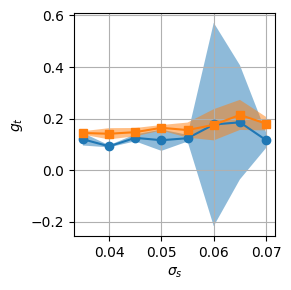

In [ ]:

means_dict_1 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_without_pen_thresh/means_dict.npy", allow_pickle=True).item()
means_dict_2 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_pen_thresh/means_dict.npy", allow_pickle=True).item()
cis_dict_1 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_without_pen_thresh/cis_dict.npy", allow_pickle=True).item()
cis_dict_2 = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Sigma_pen_thresh/cis_dict.npy", allow_pickle=True).item()


market_1 = means_dict_1["delta price"]
market_2 = means_dict_2["delta price"]
market_1_ci = cis_dict_1["delta price"]
market_2_ci = cis_dict_2["delta price"]

# Plotta i valori "market" rapportati a 360 per entrambi gli esperimenti
plt.figure(figsize=FIGSIZE)
plt.plot(sigma_s, np.array(market_1) , marker='o', label=r"$\theta_n$=0")
plt.fill_between(sigma_s, 
                 (np.array(market_1) - np.array(market_1_ci)) , 
                 (np.array(market_1) + np.array(market_1_ci)) , 
                 alpha=0.5)

plt.plot(sigma_s, np.array(market_2) , marker='s', label=r"$\theta_n$=1500")
plt.fill_between(sigma_s, 
                 (np.array(market_2) - np.array(market_2_ci)) , 
                 (np.array(market_2) + np.array(market_2_ci)) , 
                 alpha=0.5)

plt.xlabel(r"$\sigma_s$")
plt.ylabel(r"$\sigma_t$")
plt.tight_layout()
plt.grid(True)
plt.show()